 # 577 Data mining Assignment 2
## Junjie Yue

### 1. Convert the XLS data to CSV

In [1]:
import pandas as pd

data_xls = pd.read_excel('features.xls', 'Features', index_col=None)
data_xls.to_csv('features.csv', encoding='utf-8')

By using the pandas library, I can import the file as a OrderedDict type which will contain the targeted spreadsheet as a datadrame. Then use the .to_csv function to convert it into a new csv file. 

### 2. Preprocessing task 1

In [22]:
# read in the data
df = pd.read_csv('features.csv').drop(['TextID','URL'], axis = 1)
X = df.drop(['Label'], axis = 1)
y = df['Label']

In [27]:
X.head()

,Unnamed: 0,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,0,109,0,1,7,9,0,5,8,6,...,0,3,0,11,0,0,0,0,1,18
1,1,309,21,4,1,19,1,4,35,23,...,0,10,0,13,0,14,9,1,1,14
2,2,149,6,1,8,14,0,5,15,11,...,0,2,0,8,0,3,2,1,1,18
3,3,305,18,5,7,26,0,10,37,21,...,0,8,3,13,1,7,1,1,1,20
4,4,491,23,8,33,47,0,12,61,36,...,0,16,2,34,1,5,6,1,1,24


By looking at the metadata, there are several features that are not frequencies, which are: TextId, URL, Label,sentence1st, sentenceLast, txtcomplexity. I choose to remove the TextID and URL features. I deleted them simply because these columns don't contain any information thta will help to label the texts, they are just some metadata that holds information about where they come from and some order sequences that uniquely marked them in the convinience of indexing or sorting. 

### 3. Classification task

In [24]:

# Split dataset in training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
# Gaussian Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# calculate the accuracies on training set and test set
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


# calaculate 
model = GaussianNB()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print(metrics.cohen_kappa_score(expected, predicted))

Accuracy of GNB classifier on training set: 0.82
Accuracy of GNB classifier on test set: 0.83
GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

   objective       0.83      0.91      0.87       635
  subjective       0.81      0.68      0.74       365

    accuracy                           0.82      1000
   macro avg       0.82      0.79      0.80      1000
weighted avg       0.82      0.82      0.82      1000

[[575  60]
 [117 248]]
0.6050517672259907


In [26]:
# MultinomialNB
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# calculate the accuracies on training set and test set
print('Accuracy of MNB classifier on training set: {:.2f}'
     .format(mnb.score(X_train, y_train)))
print('Accuracy of MNB classifier on test set: {:.2f}'
     .format(mnb.score(X_test, y_test)))


model = MultinomialNB()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print(metrics.cohen_kappa_score(expected, predicted))

Accuracy of MNB classifier on training set: 0.74
Accuracy of MNB classifier on test set: 0.72
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
              precision    recall  f1-score   support

   objective       0.90      0.66      0.77       635
  subjective       0.60      0.88      0.71       365

    accuracy                           0.74      1000
   macro avg       0.75      0.77      0.74      1000
weighted avg       0.79      0.74      0.75      1000

[[422 213]
 [ 45 320]]
0.493034131771826


 As we can see from the results abouve, it is obvious that the Multimonial Naive Bayes classifier is a better fit on the dataset as the kappa statistic of MNB is greater than it is of GNB and the accuracy of MNB is greater as well. Higher kappa value indicates better agreement. 

### 4. Preprocessing task 2

In [7]:
from sklearn.neighbors import KNeighborsClassifier


# k = 3 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


# Train the model using the training sets
knn.fit(X, y)
print(knn)
# make predictions
expected = y
predicted = knn.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print(metrics.cohen_kappa_score(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

   objective       1.00      0.99      0.99       635
  subjective       0.99      0.99      0.99       365

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

[[631   4]
 [  3 362]]
0.9849079384243887


In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# n_splits = 4 for 4-fold cross-validation
kf = KFold(n_splits=4, shuffle= True)
kf.get_n_splits(X)
knn = KNeighborsClassifier(n_neighbors=3)
kappa = 0
for train_index, test_index in kf.split(X):

    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
# Train the model using the training sets
    knn.fit(X_train,y_train )
# apply the model to the test set
    predicted = knn.predict(X_test)
    kappa_iter = metrics.cohen_kappa_score(y_test, predicted)  
    kappa = kappa + kappa_iter
print('mean kappa: {}'.format(kappa/4))    

mean kappa: 0.9718526798730125


In [9]:
# apply the transformer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# scaler = StandardScaler()
# X_scaled = scaler.fit(X).transform(X)

# n_splits = 4 for 4-fold cross-validation
kf = KFold(n_splits=4, shuffle= False)
kf.get_n_splits(X)
knn = KNeighborsClassifier(n_neighbors=3)
kappa = 0
for train_index, test_index in kf.split(X_scaled):

#     X_train = X.iloc[train_index]
    X_train = np.take(X_scaled,train_index).reshape(-1, 1)
#     y_train = np.take(y_scaled,train_index)
    y_train = y.iloc[train_index]
#     X_test = X.iloc[test_index]
    X_test = np.take(X_scaled,test_index).reshape(-1, 1)
#     y_test = np.take(y_scaled,test_index)
    y_test = y.iloc[test_index]
    
# Train the model using the training sets
    knn.fit(X_train,y_train )
# apply the model to the test set
    predicted = knn.predict(X_test)
    kappa_iter = metrics.cohen_kappa_score(y_test, predicted)  
    print(kappa_iter)
    kappa = kappa + kappa_iter
print('mean kappa: {}'.format(kappa/4))    

0.0
0.0
-0.02694709168583631
0.0
mean kappa: -0.006736772921459078


For this part of the assignment, the result generated from the code above doesn't seem correct, as the value of Kappa is usually between 0 and 1. Here are the attempts that I have tried to fix the problem. 
 1. convert y to a numpy array. I noticed that after doing the standardization to X, it became a numpy array instead of a pandas dataframe. So I tried to do the same to y. But this didn't seem to fix the probem. 
 2. Apply stadardization to y. y is a catogorical attribute which means it cannot be numerically standardized. 

In [10]:
# apply the transformer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
y_scaled = y.to_numpy()

# n_splits = 4 for 4-fold cross-validation
kf = KFold(n_splits=4, shuffle= False)
kf.get_n_splits(X)
knn = KNeighborsClassifier(n_neighbors=3)
kappa = 0
for train_index, test_index in kf.split(X_scaled):

#     X_train = X.iloc[train_index]
    X_train = np.take(X_scaled,train_index).reshape(-1, 1)
    y_train = np.take(y_scaled,train_index)
#     y_train = y.iloc[train_index]
#     X_test = X.iloc[test_index]
    X_test = np.take(X_scaled,test_index).reshape(-1, 1)
    y_test = np.take(y_scaled,test_index)
#     y_test = y.iloc[test_index]
    
# Train the model using the training sets
    knn.fit(X_train,y_train )
# apply the model to the test set
    predicted = knn.predict(X_test)
    kappa_iter = metrics.cohen_kappa_score(y_test, predicted)  
    print(kappa_iter)
    kappa = kappa + kappa_iter
print('mean kappa: {}'.format(kappa/4)) 

0.0
0.0
-0.02694709168583631
0.0
mean kappa: -0.006736772921459078


In [11]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def knn_4fold(k): 
    # n_splits = 4 for 4-fold cross-validation
    kf = KFold(n_splits=4, shuffle= True)
    kf.get_n_splits(X)
    knn = KNeighborsClassifier(n_neighbors=k)
    kappa = 0
    for train_index, test_index in kf.split(X):

        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]

    # Train the model using the training sets
        knn.fit(X_train,y_train )
    # apply the model to the test set
        predicted = knn.predict(X_test)
        kappa_iter = metrics.cohen_kappa_score(y_test, predicted)  
        kappa = kappa + kappa_iter
    return kappa/4 


In [12]:
kappa_list = []
k_range = range(1,30)
for k in k_range:
    kappa_k = knn_4fold(k)
    kappa_list.append(kappa_k)

Text(0, 0.5, 'Kappa')

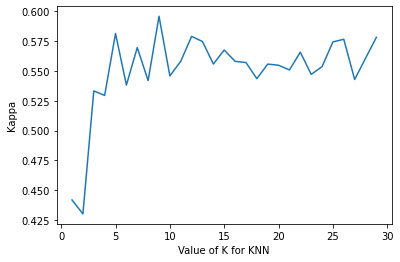

In [13]:
# plot how kappa changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, kappa_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Kappa')

I think 5 is a better value of k, according to the plot above. As the value of k gets larger, the value of kappa seems to fluctuate within a certain range. 